Task 2

In [151]:
import pandas as pd
import numpy as np


In [152]:
df = pd.read_csv('task2.csv')
df.info()
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print(df.head())
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print(df.tail())
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13972 entries, 0 to 13971
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Work_Year         13972 non-null  int64 
 1   Experience_Level  13972 non-null  object
 2   Employment_Type   13972 non-null  object
 3   Job_Title         13972 non-null  object
 4   Salary            13972 non-null  int64 
 5   Salary_Currency   13972 non-null  object
 6   Remote_Ratio      13972 non-null  int64 
 7   Company_Size      13972 non-null  object
dtypes: int64(3), object(5)
memory usage: 873.4+ KB
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   Work_Year Experience_Level Employment_Type                  Job_Title  \
0       2024     Senior-Level       Full-Time                AI Engineer   
1       2024     Senior-Level       Full-Time  Machine Learning Engineer   
2       2024     Senior-Level       Full-Time  Machine Learning Engineer   
3       2024     Senior-Level       F

,Work_Year,Salary,Remote_Ratio
count,13972.000000,1.397200e+04,13972.000000
mean,2023.085600,1.660011e+05,33.334526
std,0.687612,3.661545e+05,46.682931
min,2020.000000,1.400000e+04,0.000000
25%,2023.000000,1.040000e+05,0.000000
50%,2023.000000,1.422000e+05,0.000000
75%,2024.000000,1.880000e+05,100.000000
max,2024.000000,3.040000e+07,100.000000


Based on the status, there is no missing values, and we can't really state that there is a duplicate value, because there is no unique identifiers that can be used to identify duplicate values.

In [153]:
currency_counts = df['Salary_Currency'].value_counts()
print(currency_counts)
currencies_to_remove = currency_counts[currency_counts < 10].index.tolist()
df = df[~df['Salary_Currency'].isin(currencies_to_remove)]
print("==================================")
currency_counts = df['Salary_Currency'].value_counts()
print(currency_counts)


Salary_Currency
USD    12876
GBP      522
EUR      414
INR       52
CAD       49
AUD       12
PLN        7
CHF        6
SGD        6
JPY        4
BRL        4
DKK        3
HUF        3
TRY        3
NOK        2
THB        2
ZAR        1
HKD        1
ILS        1
PHP        1
NZD        1
MXN        1
CLP        1
Name: count, dtype: int64
Salary_Currency
USD    12876
GBP      522
EUR      414
INR       52
CAD       49
AUD       12
Name: count, dtype: int64


In [154]:
from forex_python.converter import CurrencyRates
unique_currencies = df['Salary_Currency'].unique()
c = CurrencyRates()
exchange_rates = c.get_rates('USD')
exchange_rates['USD'] = 1.0
exchange_rate_dict = {currency: exchange_rates[currency] for currency in unique_currencies}
print(exchange_rate_dict)
def convert_to_usd(row):
    currency = row['Salary_Currency']
    return row['Salary'] / exchange_rate_dict[currency]
df['Salary'] = df.apply(convert_to_usd, axis = 1)
df = df.drop('Salary_Currency', axis = 1)


{'USD': 1.0, 'EUR': 0.9286775631500743, 'GBP': 0.794994427934621, 'CAD': 1.348254086181278, 'AUD': 1.5338967310549776, 'INR': 83.00659361069837}


In [155]:
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

df['Experience_Level'] = df['Experience_Level'].map({'Entry-Level' : 0, 'Mid-Level' : 1, 'Senior-Level' : 2})
df['Employment_Type'] = df['Employment_Type'].map({'Full-Time' : 2, 'Part-Time' : 1, 'Contract' : 0})
df['Company_Size'] = df['Company_Size'].map({'S' : 1, 'Medium' : 2, 'Large' : 3})


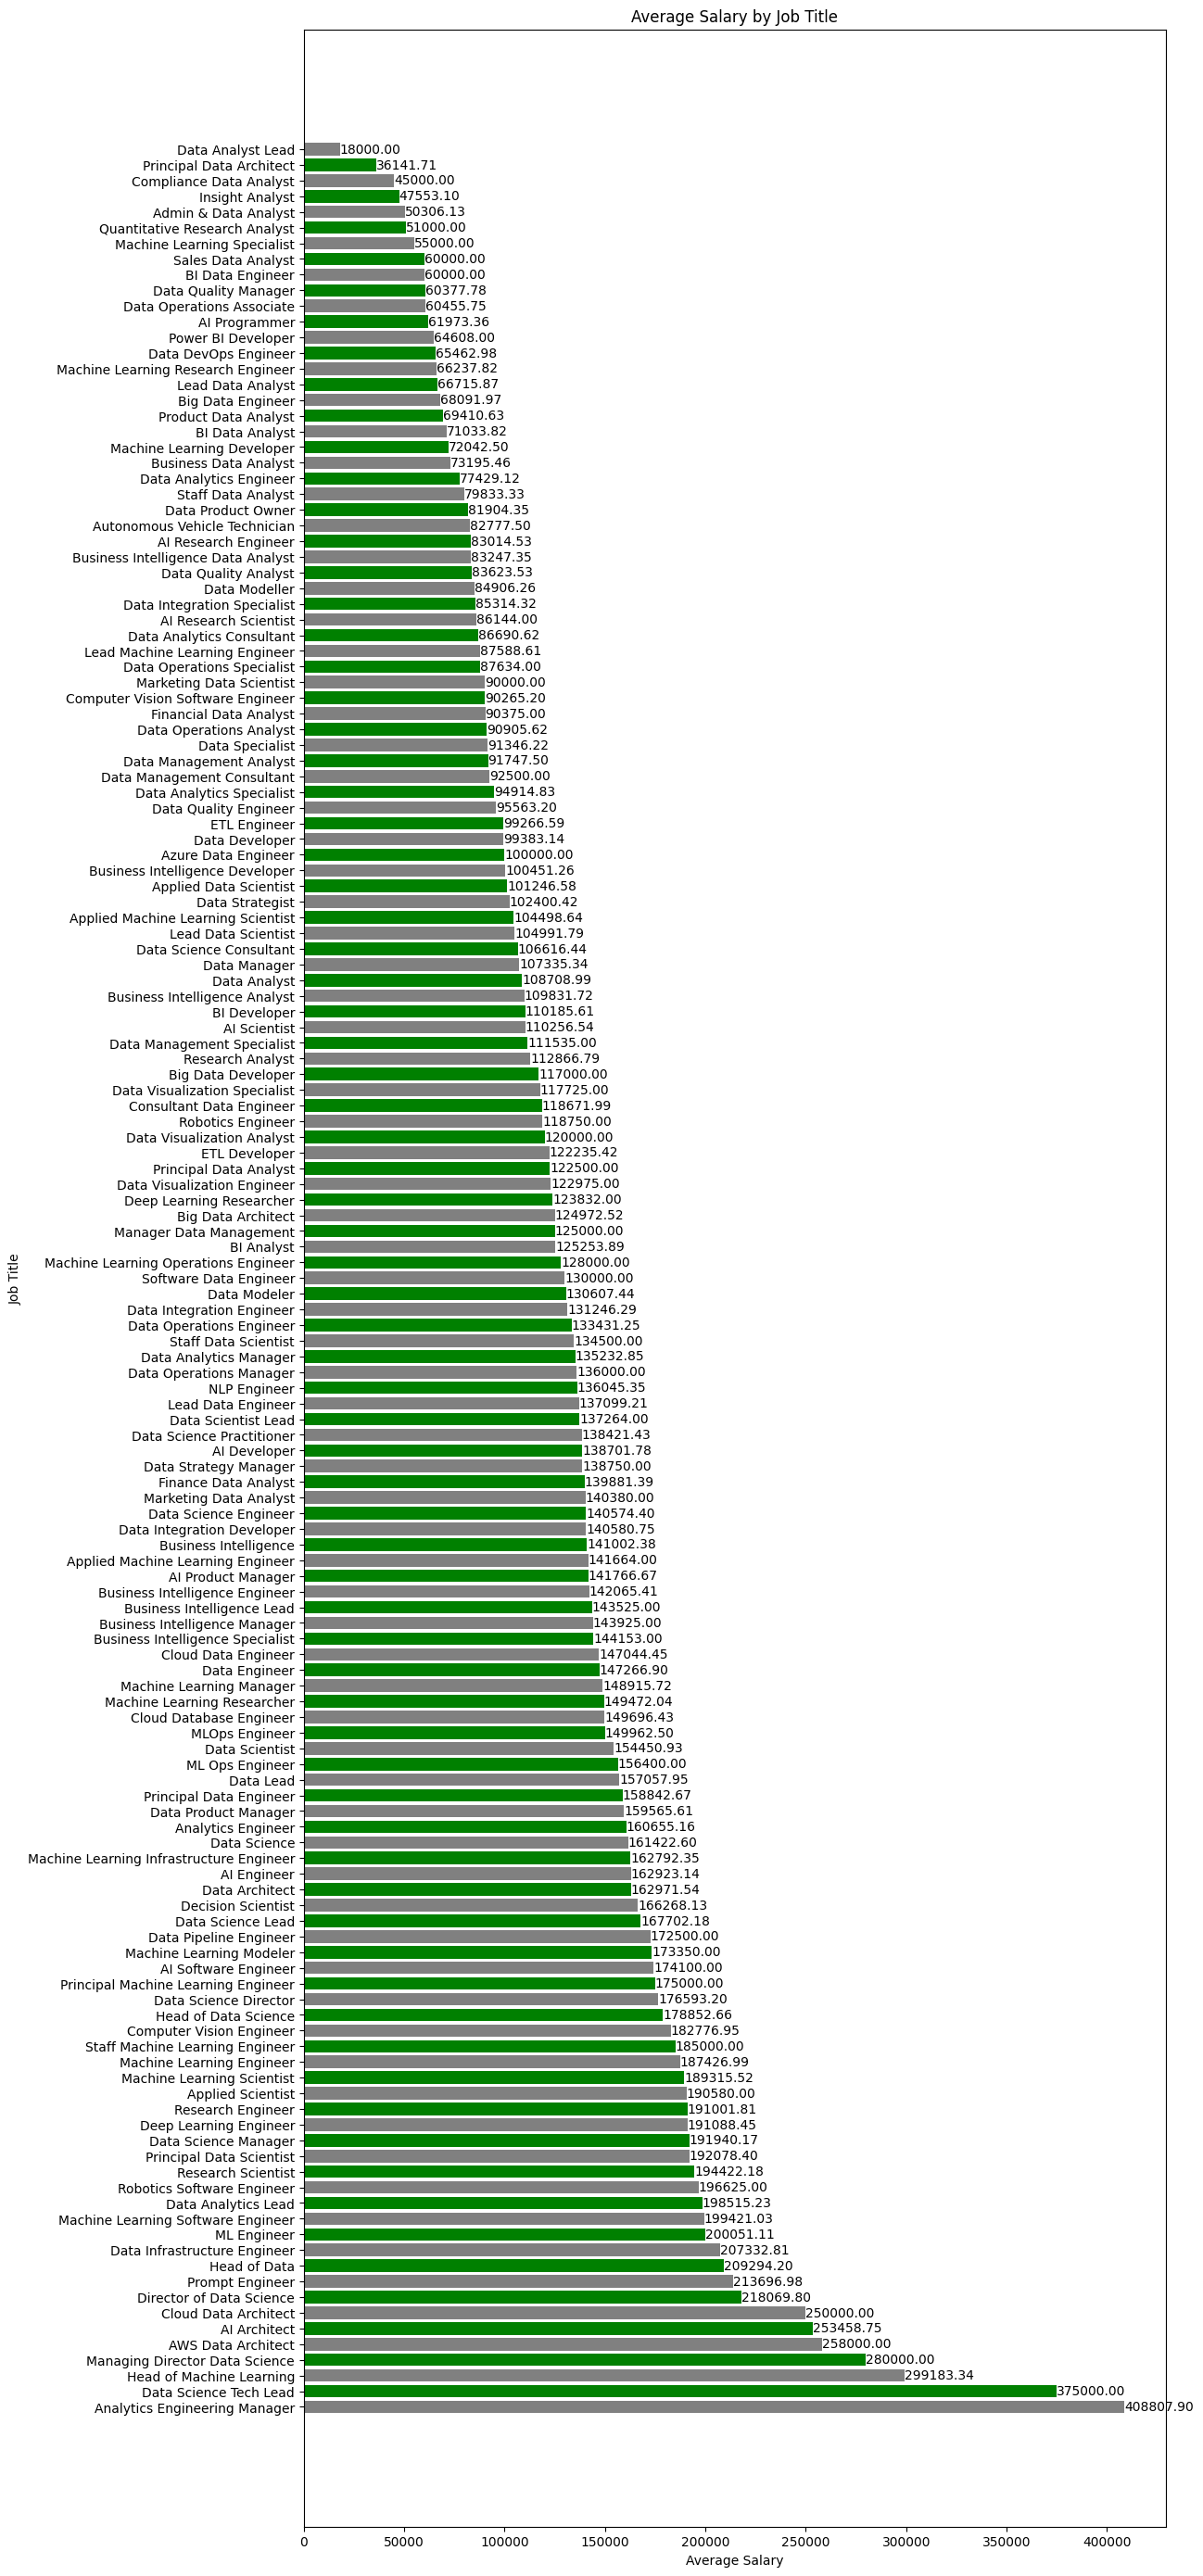

In [158]:
average_salary_by_job = df.groupby('Job_Title')['Salary'].mean()
sorted_jobs = average_salary_by_job.sort_values(ascending=False)
colors = itertools.cycle(['gray', 'green'])
plt.figure(figsize=(12, 35))
plt.xlabel('Average Salary')
plt.ylabel('Job Title')
plt.title('Average Salary by Job Title')
for job in sorted_jobs.index:
    color = next(colors)
    plt.barh(job, sorted_jobs[job], color=color)
    plt.text(sorted_jobs[job], job, f'{sorted_jobs[job]:.2f}', ha='left', va='center')

plt.show()

Job_Title
Data Engineer                     3012
Data Scientist                    2859
Data Analyst                      2076
Machine Learning Engineer         1463
Research Scientist                 441
Analytics Engineer                 387
Applied Scientist                  367
Data Architect                     337
Research Engineer                  259
Business Intelligence Engineer     216
Name: count, dtype: int64


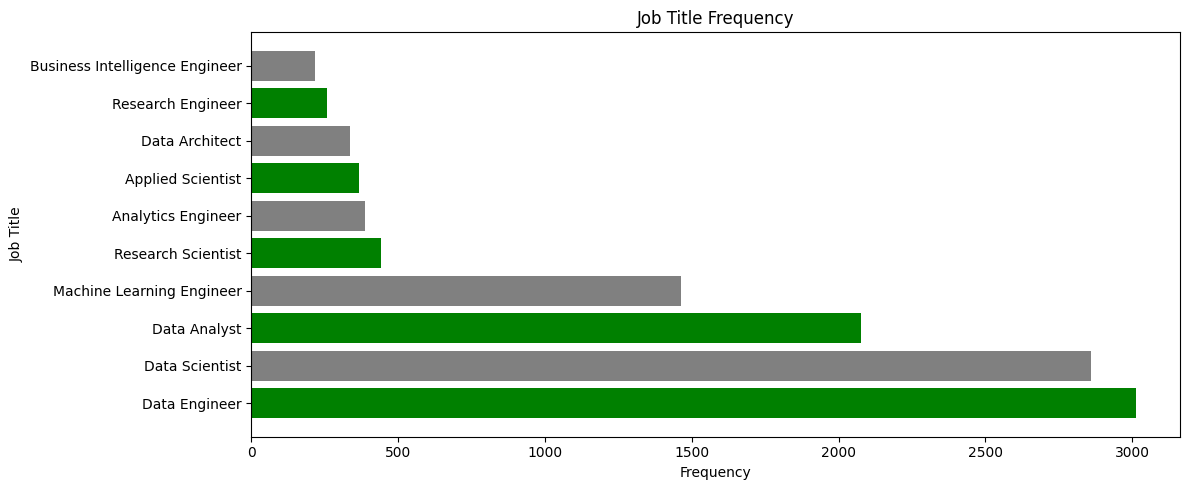

In [ ]:
job_title_frequency = df['Job_Title'].value_counts()
filtered_jobs = job_title_frequency[job_title_frequency >= 200]
sorted_jobs = filtered_jobs.sort_values(ascending=False)
print(sorted_jobs)
plt.figure(figsize=(12, 5))
for job in sorted_jobs.index:
    color = next(colors)
    plt.barh(job, sorted_jobs[job], color=color)
plt.xlabel('Frequency')
plt.ylabel('Job Title')
plt.title('Most Popular Jobs')
plt.tight_layout()
plt.show()



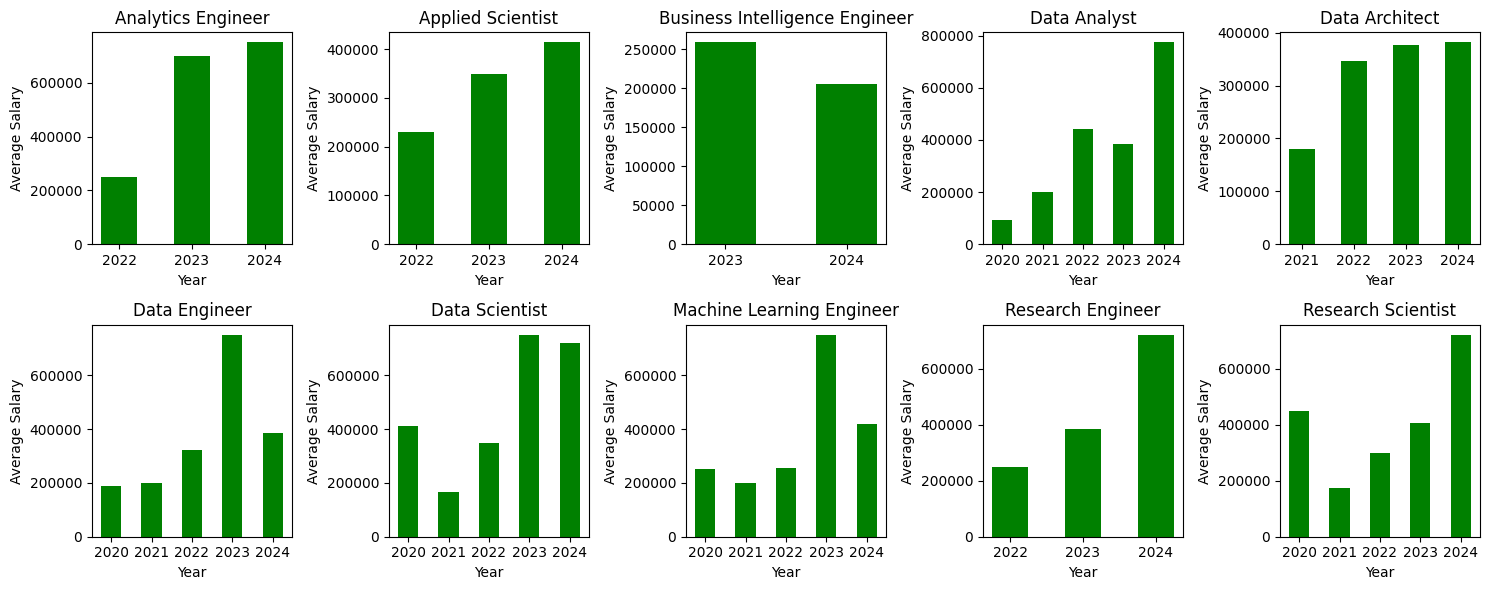

In [ ]:
filtered_df = df[df['Job_Title'].isin(filtered_jobs.index)]
grouped_data = filtered_df.groupby('Job_Title')
plt.figure(figsize=(15, 6))
index = 1
for title, data in grouped_data:
    plt.subplot(2,5,index)
    plt.bar(data['Work_Year'], data['Salary'], width=0.5, color='green')
    plt.xlabel('Year')
    plt.ylabel('Average Salary')
    plt.title(title)
    plt.xticks(range(min(data['Work_Year']), max(data['Work_Year'])+1))
    plt.locator_params(axis='x', nbins=len(data['Work_Year']))
    plt.tight_layout()
    index += 1
plt.show()
    

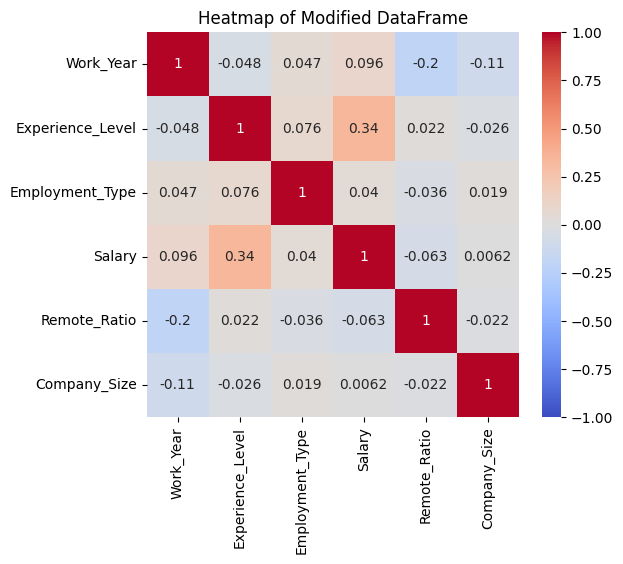

In [ ]:
job_title = df['Job_Title']
df_temp = df.drop('Job_Title', axis = 1)
correlation_matrix = df_temp.corr()

plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Modified DataFrame')
plt.show()